In [1]:
import threading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



columns = ["Website",'test_name', 'HTTP status code', "Success", "Redirected to ISP Payload"]
df = pd.DataFrame(columns=columns)

text_file = "../../../../BlockingLists/russianWebsites.txt"


cyta_payload = "This site can’t be reached due tο compliance the Council Regulation (EU) 350/2022 and with EU and National Laws, only for as long as necessary."


def find_payload(text):
   if cyta_payload in text:
       return True
   else: 
       return False

In [2]:
from blocking_methods.data_processing.usual_requests import test_http_or_https


def test_sites_from_file(filename):
    with open(filename, "r") as file:
        websites = [line.strip() for line in file]

    threads = []
    for site in websites:
        thread = threading.Thread(target=process_site, args=(site,))
        thread.start()
        threads.append(thread)
    for thread in threads:
        thread.join()


def process_site(site):
    df_row = test_http_or_https(site)
    df.loc[len(df)] = df_row


# def test_sites_from_file(filename):
#     with open(filename, "r") as file:
#         websites = [line.strip() for line in file]
# 
#     for site in websites:
#         process_site(site)
# 
# 
# def process_site(site):
#     df_row = test_http_or_https(site)
#     df.loc[len(df)] = df_row


test_sites_from_file(text_file)     


Trying vk.comTrying gosuslugi.ru

Trying ria.ru
Trying rt.com
Trying lenta.ru
Trying tass.ru
Trying regnum.ru
Trying russian.rt.com
Trying vesti.ru
Trying svpressa.ru
Trying iz.ru
Trying vz.ru
Trying rg.ru
Trying admburla.ru
Trying rosguard.gov.ru
Trying mos.ru
Trying pochta.ru
Trying rt.ru
Trying nalog.ru
Trying aeroflot.ru
Trying voskhod.ru
after redirections: aeroflot.ru
An error occurred: HTTPSConnectionPool(host='admburla.ru', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))
An error occurred: Invalid input ConnectionInputs.RECV_HEADERS in state ConnectionState.CLOSED
after redirections: ria.ru
after redirections: voskhod.ru
after redirections: gosuslugi.ru
after redirections: iz.ru
after redirections: russian.rt.com
after redirections: vz.ru
after redirections: svpressa.ru
after redirections: rg.ru
after redirection

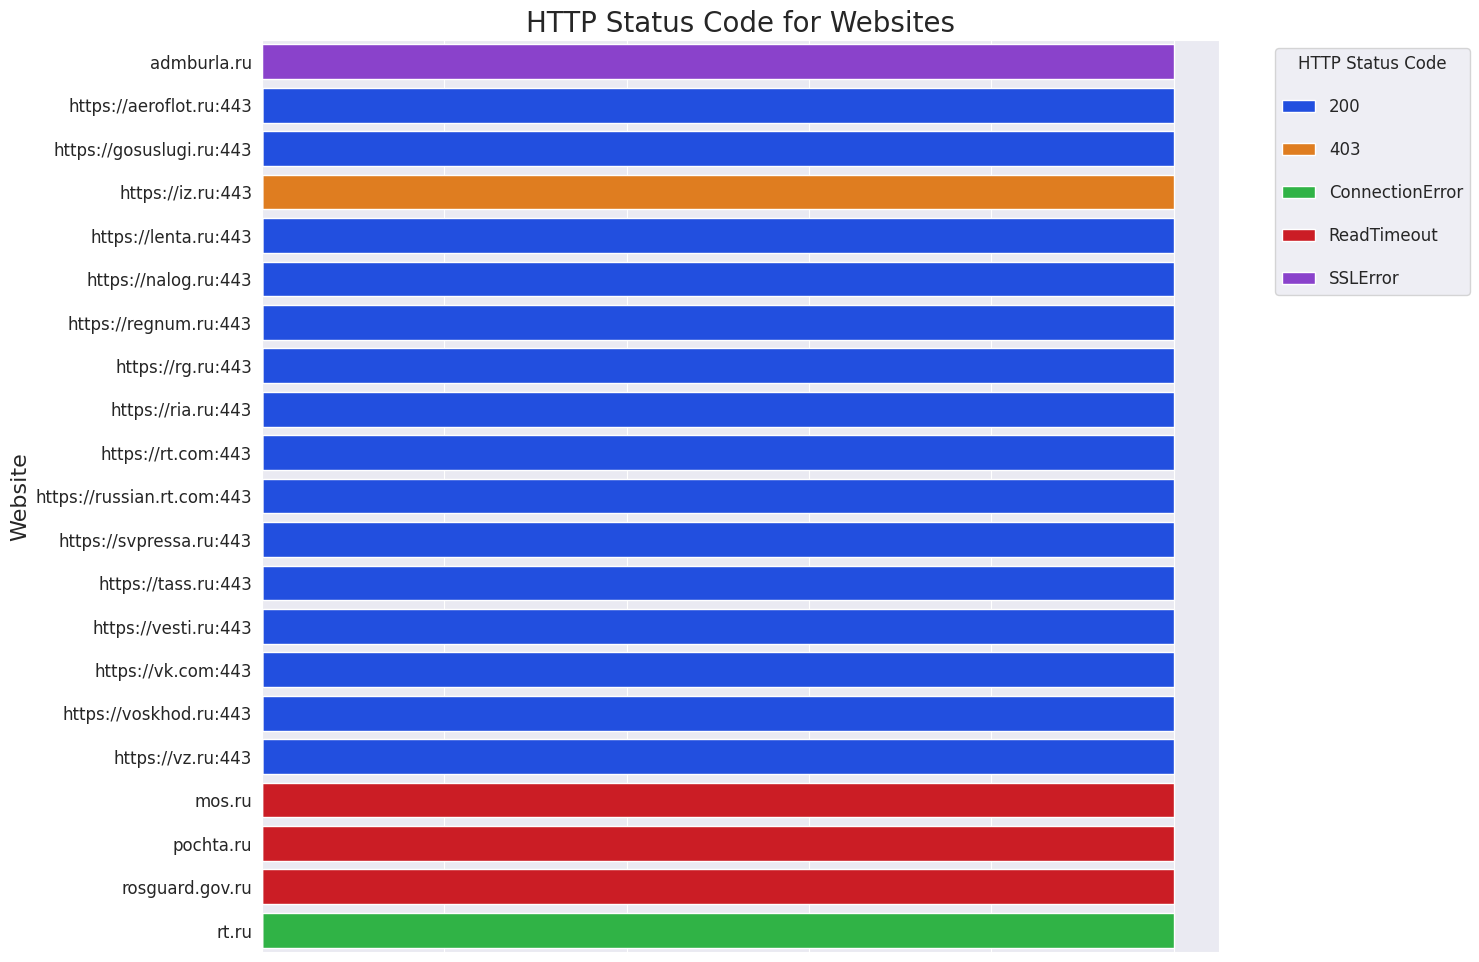

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

website_status_counts = df.groupby(['Website', 'HTTP status code']).size().unstack(fill_value=0)

colors = sns.color_palette('bright', len(website_status_counts.columns))

plt.figure(figsize=(15, 10))
for http_status_code, data, color in zip(website_status_counts.columns, website_status_counts.values.T, colors):
    sns.barplot(x=data, y=website_status_counts.index, color=color, label=http_status_code)

plt.title('HTTP Status Code for Websites', fontsize=20)
plt.ylabel('Website', fontsize=16)
plt.legend(title='HTTP Status Code', title_fontsize='large', fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', labelspacing=1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.gca().set_xticklabels([])
plt.savefig('http_status_code_distribution.png', dpi=300)
plt.show()


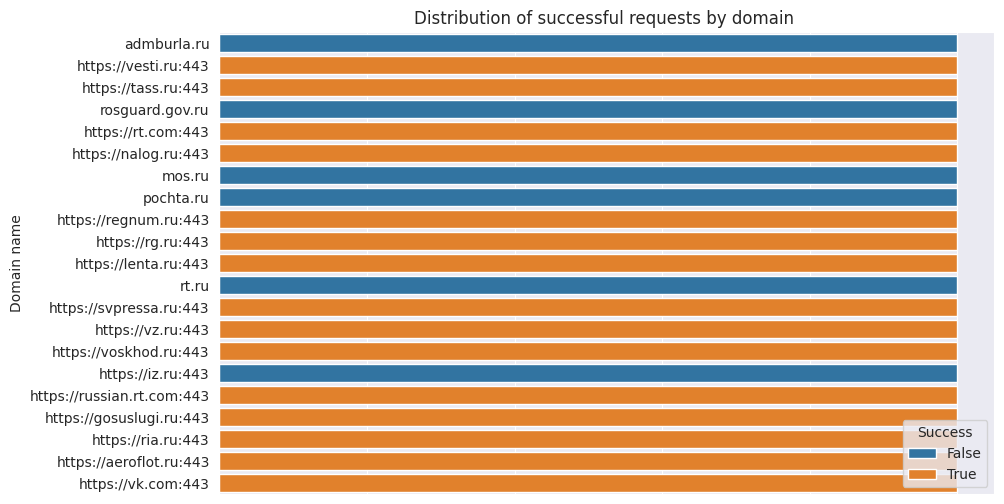

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(y='Website', hue='Success', data=df, order=df['Website'].value_counts().index[:])
plt.title('Distribution of successful requests by domain ')
plt.ylabel('Domain name')
plt.xlabel('')
plt.legend(title='Success', loc='lower right')
plt.gca().set_xticklabels([])
plt.show()


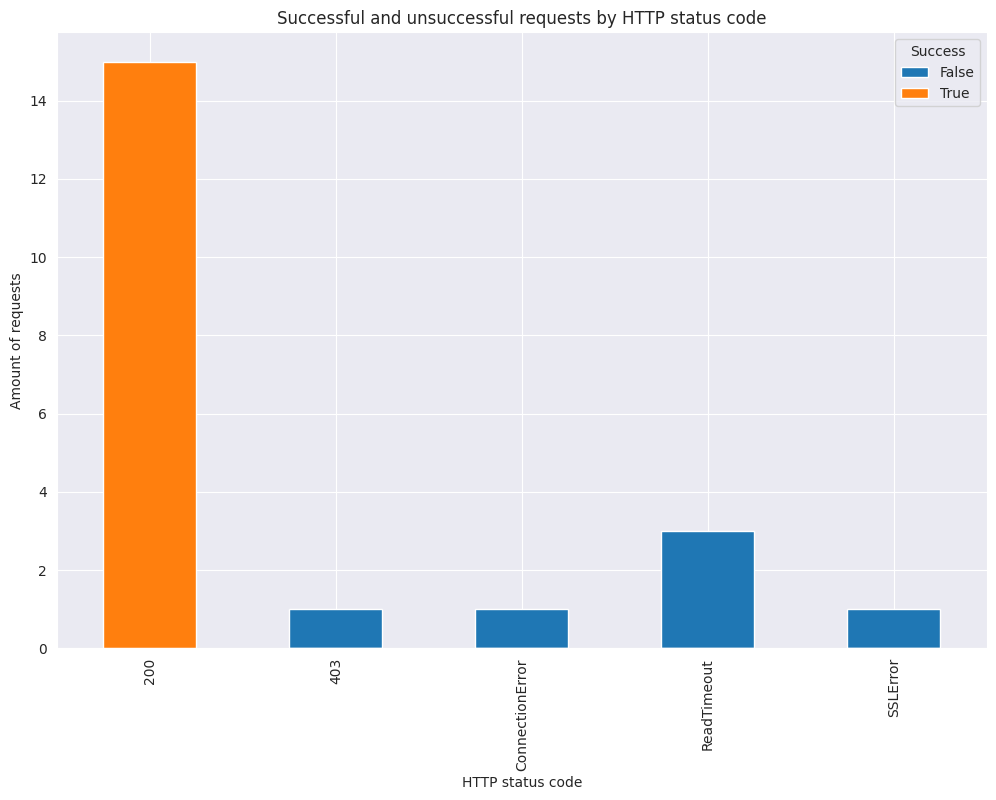

In [5]:
http_status_counts = df.groupby(['HTTP status code', 'Success']).size().unstack(fill_value=0)

http_status_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Successful and unsuccessful requests by HTTP status code')
plt.xlabel('HTTP status code')
plt.ylabel('Amount of requests')
plt.legend(title='Success', loc='upper right')
plt.show()


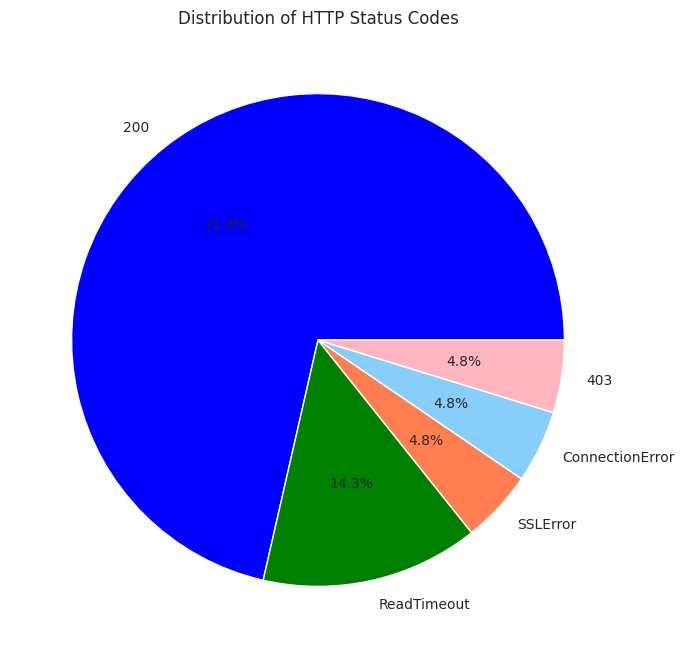

In [6]:
plt.figure(figsize=(8, 8))
df['HTTP status code'].value_counts().plot(kind='pie', autopct='%1.1f%%',  colors=['blue', 'green', 'coral', 'lightskyblue', 'lightpink'])
plt.title('Distribution of HTTP Status Codes')
plt.ylabel('')
plt.show()



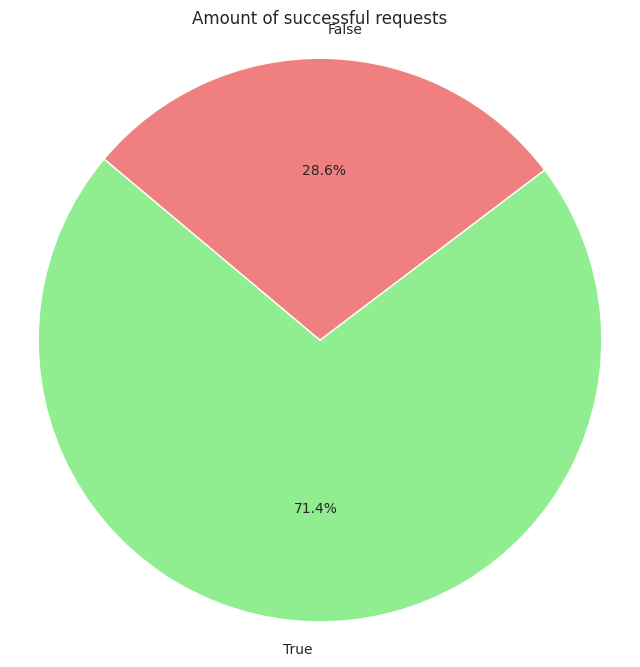

In [7]:
success_counts = df['Success'].value_counts()
labels = success_counts.index
sizes = success_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Amount of successful requests')
plt.axis('equal')
plt.show()


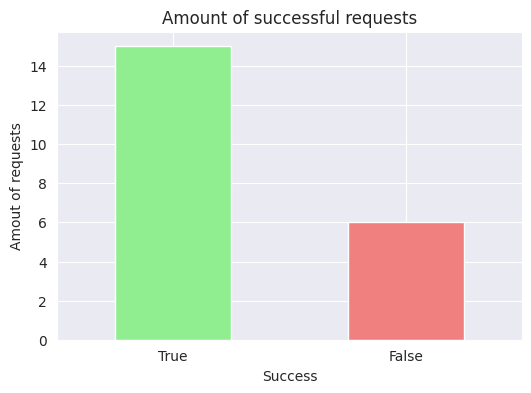

In [8]:
success_counts = df['Success'].value_counts()
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Amount of successful requests')
plt.xlabel('Success')
plt.ylabel('Amout of requests')
plt.xticks(ticks=[0, 1], labels=['True', 'False'], rotation=0)
plt.show()
